# Análisis Exploratorio de Datos

##### En este documento, se llevará acabo un análisis exploratorio de datos(EDA) de la industria de telecomunicaciones en Argentina. Este proceso incluirá la limpieza y normalización de las partes del conjunto de datos que se requieran, con el objetivo de  buscar insights valiosos que nos ayuden a tener un entendimiento más profundo del comportamiento del mercado.

#### Librerías necesarias

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualización del acceso a Internet por Tecnología

In [ ]:
I_at = pd.read_csv('Accesos_tecnologia_localidad.csv')

In [80]:
I_at.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


In [81]:
I_at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Provincia      3072 non-null   object
 1   Partido        3072 non-null   object
 2   Localidad      3072 non-null   object
 3   Link Indec     3072 non-null   object
 4   ADSL           3072 non-null   int64 
 5   CABLEMODEM     3072 non-null   int64 
 6   DIAL UP        3072 non-null   int64 
 7   FIBRA OPTICA   3072 non-null   int64 
 8   OTROS          3072 non-null   int64 
 9   SATELITAL      3072 non-null   int64 
 10  WIMAX          3072 non-null   int64 
 11  WIRELESS       3072 non-null   int64 
 12  Total general  3072 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 312.1+ KB


In [5]:
I_at.describe()

,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3072.000000,3.072000e+03,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3.072000e+03
mean,252.107747,1.948879e+03,3.838867,1306.999023,78.460286,0.953776,0.712240,194.883464,3.786835e+03
std,1617.786217,2.278130e+04,43.181703,8894.629351,1057.810117,13.610929,15.102835,751.069544,3.174705e+04
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.775000e+01
50%,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,28.000000,1.680000e+02
75%,64.000000,8.250000e+00,0.000000,160.000000,0.000000,1.000000,0.000000,128.000000,1.034500e+03
max,70108.000000,1.177475e+06,2050.000000,281390.000000,46762.000000,742.000000,444.000000,19906.000000,1.504711e+06


Búsqueda de duplicados

In [84]:
duplicados  = sum(I_at.duplicated())
duplicados

0

#### Gráfica de distribución por tecnología en distintas Provincias

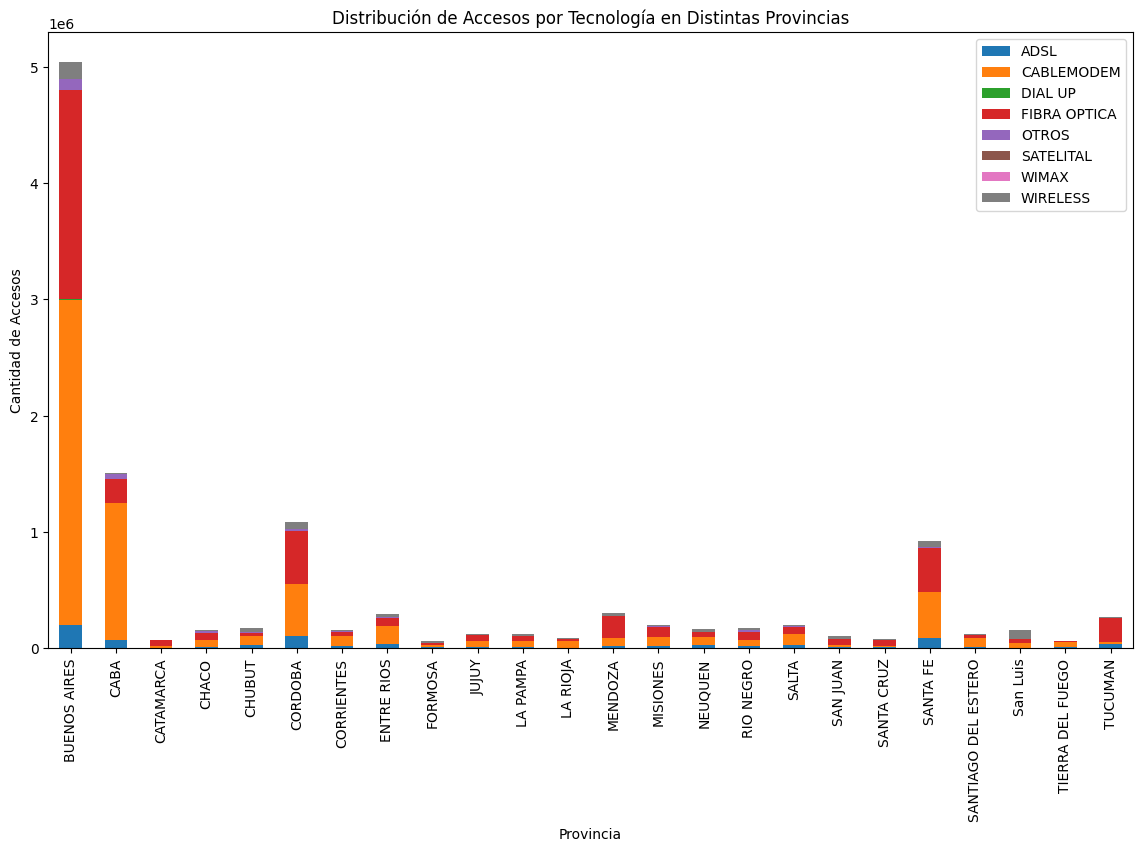

In [58]:

I_at = pd.read_csv('Internet_Acceso_por_localidad.csv')

I_at_agru = I_at.groupby('Provincia').sum()

fig, ax = plt.subplots(figsize=(14, 8))
tecnologia = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']
I_at_agru[tecnologia].plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Provincia')
ax.set_ylabel('Cantidad de Accesos')
ax.set_title('Distribución de Accesos por Tecnología en Distintas Provincias')
plt.xticks(rotation=90)

plt.show()


#### Análisis

1. Distribución de tecnologías:
- Cable FIBRA óPTICA y CABLEMODEM son de las tecnolgías predominantes en casi todas las provincias, mientras que DIAL UP y otras tecnologías más antiguas casi no tienen presencia en ninguna parte. Lo que sugiere una preferencia por este tipo de conexión más moderno.
- Tecnologías como SATELITAL, WIMAX, y WIRELESS tienen una presencia relativamente baja. Sin embargo, WIRELESS muestra cierta adopción en áreas donde otras tecnologías pueden no estar disponibles o ser prácticas.
- SATELITAL y WIMAX parecen ser utilizadas en áreas específicas, posiblemente rurales o de difícil acceso, donde las tecnologías de cable y fibra no son viables.
- Las provincias con altos accesos a FIBRA OPTICA o CABLEMODEM muestran una infraestructura más desarrollada para internet de alta velocidad.
- ADSL tiene una presencia considerable en varias provincias, lo que indica que todavía se utiliza ampliamente, posiblemente debido a la infraestructura existente y a costos más bajos en comparación con la fibra óptica.
2. Varianza entre provincias:
- La alta varianza entre la cantidad de accesos a internet por provincias es principalmente debido al número de habitantes, como era de esperarse Buenos Aires es la provincia con mayor cifra de accesos solicitados y cantidad de habitantes con aproximadamente 17,5 millones, seguida por la Ciudad Autónoma de Buenos Aires con aproximadamente 3,1 millones de habitantes, etc.
(Datos recopilados del censo 2022 según https://www.argentina.gob.ar/pais/provincias)
- Las provincias como BUENOS AIRES muestran una infraestructura diversificada con múltiples tecnologías presentes.
3. Potenciales áreas de mejora:
- Provincias con bajas cantidades de acceso en general pueden ser objetivos para inversiones en infraestructura de internet.
- Promover el cambio de tecnologías más antiguas a más nuevas (por ejemplo, de ADSL a FIBRA OPTICA) mejorará la calidad del servicio.

### Visualización de los Accesos a Internet por velocidad sin Rango 

In [86]:
I_avsr = pd.read_csv('Internet_Acc_vel_loc_sinrangos.csv')
I_avsr

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,2.0,NaN,19.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
3061,TUCUMAN,Trancas,San Pedro de Colalao,90112020,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3062,TUCUMAN,Trancas,Villa de Trancas,90112030,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3063,TUCUMAN,Yerba Buena,Villa Carmela,90119020,8.0,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
I_avsr.describe()

,Otros,"0,256 Mbps","0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,"1,5 Mbps",2 Mbps,"2,2 Mbps","2,5 Mbps",...,680 Mbps,700 Mbps,800 Mbps,850 Mbps,900 Mbps,999 Mbps,1000 Mbps,1024 Mbps,4000 Mbps,10000 Mbps
count,1030.000000,36.000000,642.000000,525.000000,284.000000,872.000000,15.000000,677.000000,1.0,4.000000,...,1.0,4.0,4.000000,1.0,1.0,17.000000,420.000000,2.0,1.0,2.000000
mean,318.614563,2.944444,42.978193,2.100952,39.588028,66.642202,132.533333,101.428360,18.0,156.500000,...,5.0,1.0,153.500000,1.0,110.0,3.352941,609.683333,1.0,1.0,5.000000
std,2964.939611,5.806127,985.466627,4.684645,118.563946,222.345674,291.222268,278.821468,NaN,212.528429,...,NaN,0.0,273.381906,NaN,NaN,5.700232,3431.387543,0.0,NaN,5.656854
min,-15.000000,1.000000,0.000000,1.000000,1.000000,0.000000,7.000000,1.000000,18.0,21.000000,...,5.0,1.0,1.000000,1.0,110.0,1.000000,1.000000,1.0,1.0,1.000000
25%,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,31.000000,4.000000,18.0,35.250000,...,5.0,1.0,10.750000,1.0,110.0,1.000000,17.000000,1.0,1.0,3.000000
50%,6.000000,1.000000,1.000000,1.000000,9.500000,10.000000,47.000000,21.000000,18.0,66.500000,...,5.0,1.0,25.000000,1.0,110.0,2.000000,139.500000,1.0,1.0,5.000000
75%,48.000000,2.000000,2.000000,1.000000,28.000000,40.250000,75.000000,77.000000,18.0,187.750000,...,5.0,1.0,167.750000,1.0,110.0,3.000000,498.000000,1.0,1.0,7.000000
max,87722.000000,31.000000,24968.000000,61.000000,1307.000000,4111.000000,1170.000000,3530.000000,18.0,472.000000,...,5.0,1.0,563.000000,1.0,110.0,25.000000,68405.000000,1.0,1.0,9.000000


Búsqueda de duplicados

In [87]:
duplicados  = sum(I_avsr.duplicated())
duplicados

0

Eliminacion de columnas con una cantidad de usuarios casi nula o nula 

In [23]:
columnas_eliminadas = []

for col in I_avsr.columns:
    if I_avsr[col].isna().sum() > 3000:
        columnas_eliminadas.append(col)
print(columnas_eliminadas)
nuevo_I_avsr = I_avsr.drop(columns=columnas_eliminadas)
nuevo_I_avsr.head()


['0,256 Mbps', '1,5 Mbps', '2,2 Mbps', '2,5 Mbps', '3,3 Mbps', '4,5 Mbps', '6,4 Mbps', '7,5 Mbps', '9 Mbps', '10,1 Mbps', '10,2 Mbps', '11 Mbps', '12,3 Mbps', '13 Mbps', '14 Mbps', '16 Mbps', '17 Mbps', '18 Mbps', '20,5 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps', '25,1 Mbps', '25,5 Mbps', '26 Mbps', '27 Mbps', '31 Mbps', '32 Mbps', '35 Mbps', '36 Mbps', '41 Mbps', '45 Mbps', '48 Mbps', '49 Mbps', '50,1 Mbps', '50,25 Mbps', '51 Mbps', '55 Mbps', '59 Mbps', '61 Mbps', '65 Mbps', '66 Mbps', '70 Mbps', '80 Mbps', '85 Mbps', '90 Mbps', '95 Mbps', '98 Mbps', '100,1 Mbps', '100,25 Mbps', '105 Mbps', '110 Mbps', '120 Mbps', '122 Mbps', '125 Mbps', '130 Mbps', '140 Mbps', '155 Mbps', '160 Mbps', '164 Mbps', '165 Mbps', '180 Mbps', '205 Mbps', '212 Mbps', '220 Mbps', '225 Mbps', '240 Mbps', '246 Mbps', '250 Mbps', '256 Mbps', '275 Mbps', '320 Mbps', '325 Mbps', '330 Mbps', '350 Mbps', '400 Mbps', '450 Mbps', '480 Mbps', '512 Mbps', '520 Mbps', '540 Mbps', '680 Mbps', '700 Mbps', '800 Mbps

,Provincia,Partido,Localidad,Link Indec,Otros,"0,5 Mbps","0,512 Mbps","0,75 Mbps",1 Mbps,2 Mbps,...,50 Mbps,60 Mbps,75 Mbps,100 Mbps,150 Mbps,200 Mbps,300 Mbps,500 Mbps,600 Mbps,1000 Mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,2.0,NaN,19.0,NaN,NaN,...,647.0,NaN,NaN,693.0,NaN,NaN,95.0,3.0,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Agrupación de columnas

In [24]:

nuevo_I_avsr['0.5Mbps - 2Mbps'] =  nuevo_I_avsr['0,5 Mbps'] + nuevo_I_avsr['0,512 Mbps'] + nuevo_I_avsr['0,75 Mbps'] + nuevo_I_avsr['1 Mbps'] + nuevo_I_avsr['2 Mbps'] 
nuevo_I_avsr['3Mbps - 5Mbps'] =  nuevo_I_avsr['3 Mbps']  + nuevo_I_avsr['3,5 Mbps'] + nuevo_I_avsr['4 Mbps']  + nuevo_I_avsr['5 Mbps']
nuevo_I_avsr['6Mbps - 10Mbps'] = nuevo_I_avsr['6 Mbps']  + nuevo_I_avsr['7 Mbps']  + nuevo_I_avsr['8 Mbps']  + nuevo_I_avsr['10 Mbps']
nuevo_I_avsr['12Mbps - 15Mbps'] = nuevo_I_avsr['12 Mbps'] + nuevo_I_avsr['15 Mbps']
nuevo_I_avsr['25Mbps - 50Mbps'] = nuevo_I_avsr['25 Mbps'] + nuevo_I_avsr['30 Mbps']+ nuevo_I_avsr['40 Mbps'] + nuevo_I_avsr['50 Mbps']
nuevo_I_avsr['60Mbps - 75Mbps'] = nuevo_I_avsr['60 Mbps'] + nuevo_I_avsr['75 Mbps'] 
nuevo_I_avsr['100Mbps - 150Mbps'] = nuevo_I_avsr['100 Mbps'] + nuevo_I_avsr['150 Mbps']
nuevo_I_avsr['200Mbps - 300Mbps'] = nuevo_I_avsr['200 Mbps']+ nuevo_I_avsr['300 Mbps']
nuevo_I_avsr['500Mbps - 1000Mbps'] = nuevo_I_avsr['500 Mbps'] + nuevo_I_avsr['600 Mbps'] +nuevo_I_avsr['1000 Mbps']


### Gráfica de velocidad de Internet en Distintas Provincias

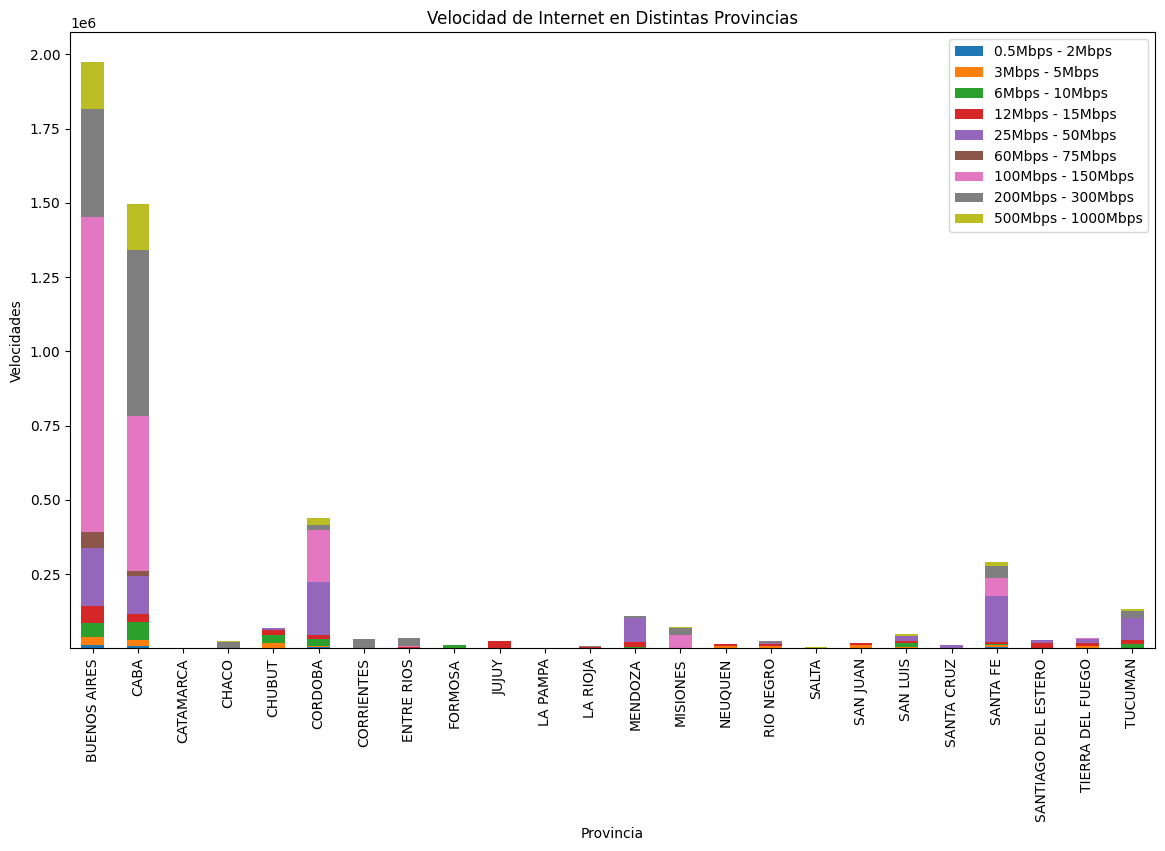

In [26]:

nuevo_I_avsr_2 = nuevo_I_avsr.groupby('Provincia').sum()
fig, ax = plt.subplots(figsize=(14, 8))

velocidad = ['0.5Mbps - 2Mbps', '3Mbps - 5Mbps', '6Mbps - 10Mbps', '12Mbps - 15Mbps', '25Mbps - 50Mbps', '60Mbps - 75Mbps', '100Mbps - 150Mbps','200Mbps - 300Mbps','500Mbps - 1000Mbps']
nuevo_I_avsr_2[velocidad].plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Provincia')
ax.set_ylabel('Velocidades')
ax.set_title('Velocidad de Internet en Distintas Provincias')
plt.xticks(rotation=90)

plt.show()

#### Análisis


1.  Variedad de velocidades:
- Buenos Aires tiene la mayor concentración de conexiones, especialmente en rangos de alta velocidad (100-150 Mbps y 500 Mbps - 1 Gbps). Esto indica una infraestructura más avanzada y una alta demanda de servicios de alta velocidad en la capital.
- Provincias como CABA, Córdoba, y Santa Fe también muestran una diversidad en las velocidades ofrecidas, aunque con menor volumen que Buenos Aires.
- Muchas provincias tienen una mayor concentración de conexiones en los rangos de 6-10 Mbps y 25-50 Mbps, indicando un acceso más limitado a velocidades ultra rápidas.
2. Desigualdad Regional:
- Provincias como Catamarca, La Pampa, Salta y La Rioja presenta una casi nula presencia de conexiones, lo que presupone un acceso a internet muy limitado y una infraestructura muy poco desarrollada.
- La desigualdad en la distribución de velocidades puede indicar una brecha digital significativa entre las provincias más desarrolladas y las menos desarrolladas.
3. Potenciales áreas de mejora:
- Las provincias con baja velocidad y pocas conexiones pueden beneficiarse de inversiones en infraestructura para mejorar la conectividad y reducir la brecha digital.
- Promover el desarrollo de redes de fibra óptica en provincias con menor acceso puede ser clave para mejorar las velocidades y la calidad del servicio.

### Visualización de Accesos a Internet por Tecnología

In [53]:
I_apt = pd.read_csv('Internet_Accesos_Por_Tecnología.csv')

In [54]:
I_apt = I_apt.dropna(subset='Año')
I_apt = I_apt.drop(985)

In [55]:
I_apt

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0
...,...,...,...,...,...,...,...,...,...
979,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0
980,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0
981,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0
982,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0


In [28]:
I_apt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Año                              984 non-null    object 
 1   Trimestre                        984 non-null    object 
 2   Provincia                        984 non-null    object 
 3   ADSL                             984 non-null    float64
 4   Cablemodem                       984 non-null    float64
 5   Fibra óptica                     984 non-null    float64
 6   Wireless                         984 non-null    float64
 7   Otros                            984 non-null    float64
 8   Total                            984 non-null    float64
 9   Meta de accesos de fibra optica  984 non-null    float64
dtypes: float64(7), object(3)
memory usage: 84.6+ KB


Búsqueda de duplicados

In [29]:
duplicados  = sum(I_apt.duplicated())
duplicados

0

Normalización de la columna Año 

In [59]:

I_apt['Año'] = I_apt['Año'].astype(str)
I_apt['Año'] = I_apt['Año'].str.replace('*', '')
I_apt['Año'] = I_apt['Año'].astype(int)


I_apt['Trimestre'] =I_apt['Trimestre'].astype(str)
I_apt['Trimestre'] = I_apt['Trimestre'].str.replace('*', '')
I_apt['Trimestre'] = I_apt['Trimestre'].astype(int)

Normalizacion de la columna Trimestre

In [60]:
I_apt['Trimestre'] =I_apt['Trimestre'].astype(str)
I_apt['Trimestre'] = I_apt['Trimestre'].str.replace('*', '')
I_apt['Trimestre'] = I_apt['Trimestre'].astype(int)

### Gráfica de la evolución de la demanda de conexión ADSL por trimestre entre los años 2014-2024

<Axes: xlabel='Año', ylabel='ADSL'>

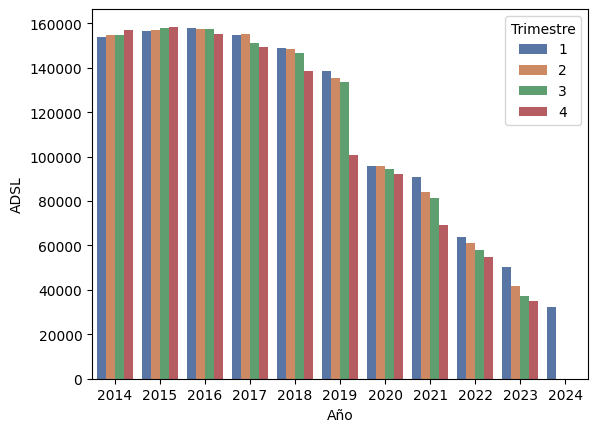

In [86]:
sns.barplot(x = 'Año', y = 'ADSL', data= I_apt, hue='Trimestre', palette= 'deep',errorbar=None)

ADSL:
-  Desde 2017, se observa una disminución significativa en las suscripciones de ADSL. Esto indica una migración de los usuarios hacia tecnologías más modernas y rápidas. Decilve acelerado entre los años 2019 y 2021.


### Gráfica de la evolución de la demanda de conexión CABLE MODEM por trimestre entre los años 2014-2024

<Axes: xlabel='Año', ylabel='Cablemodem'>

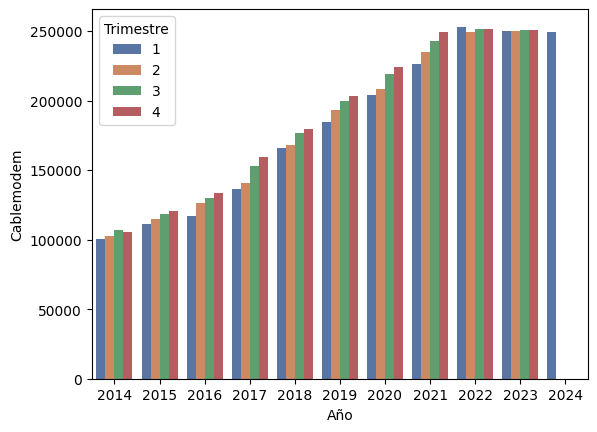

In [85]:
sns.barplot(x = 'Año', y = 'Cablemodem', data= I_apt, hue='Trimestre', palette= 'deep',errorbar=None)

Cablemódem:
- Desde 2014 hasta 2022, hay un aumento constante en las suscripciones de cablemodem, alcanzando su punto máximo en el primer trimestre de 2022. Se logra una estabilización a partir del mismo año, lo que nos indica que el producto ha alcanzado su madurez en el mercado


### Gráfica de la evolución de la demanda de conexión por FIBRA ÓPTICA por trimestre entre los años 2014-2024

<Axes: xlabel='Año', ylabel='Fibra óptica'>

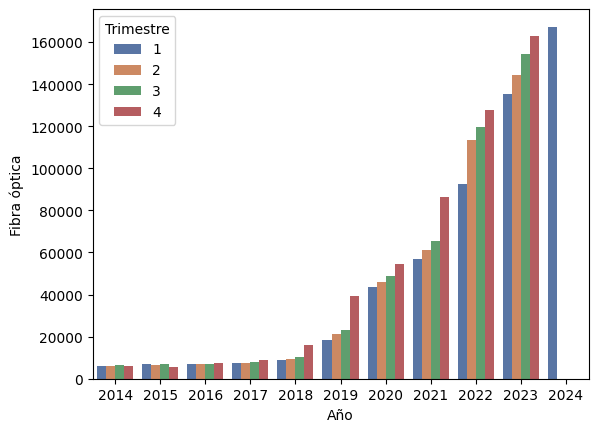

In [84]:
sns.barplot(x = 'Año', y = 'Fibra óptica', data= I_apt, hue='Trimestre', palette= 'deep',errorbar=None)

Fibra Óptica:
- Entre los años 2014-2018 se puede notar una baja demanda de este servicio, sin embargo a partir del último trimestre del año 2019 (inicio de pandemia) se nota un incremento exponecial de la cantidad de suscripciones. Esto confirma que las personas prefirieron migrar de tipo de conexión a los que son más rápidos y estables, además del crecimiento del mercado dada la coyuntura social.

### Gráfica de la evolución de la demanda de conexión por WIRELESS por trimestre entre los años 2014-2024

<Axes: xlabel='Año', ylabel='Wireless'>

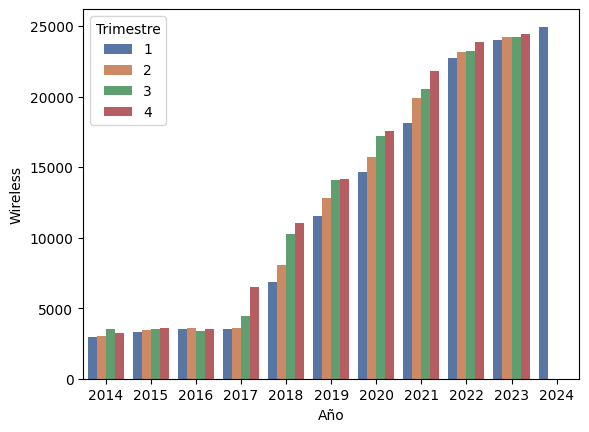

In [87]:
sns.barplot(x = 'Año', y = 'Wireless', data= I_apt, hue='Trimestre', palette= 'deep',errorbar=None)

Wireless:
- Este servicio tiene un crecimiento constante desde 2017 hasta su pico máximo en 2024, mostrándose como opción viable en zonas donde todavía no se tiene una infraestructura para fibra óptica o cablemodem.


#### Conclusiones generales de la evolución de los servicios

1. Transición de tecnologías:
- Los datos reflejan una clara transición de tecnologías más antiguas como el ADSL a las más modernas como la FIBRA ÓPTICA y CABLEMODEM.
2. Evolución del mercado: 
- El mercado ha mostrado un incremento en la demanda de servicios especialmente en el contexto de pandemia y pospandemia lo que ayudó a la evolución de las tecnologías que ofrecen más velocidad y estabilidad.
3. Potenciales áreas de mejora:
- Si bien el crecimiento del mercado ha sido muy pronunciado, fue a causa de escasas provincias. Por lo que es crucial poder abarcar la implementación de estos servicios en mayores zonas del país.


### Visualizacion del Total de media de bajada por trimestre 

In [116]:
I_tmb = pd.read_csv('Total_media_bajada_trimestre.csv')
I_tmb.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1
0,2024,1,139.15,Ene-Mar 2024
1,2023,4,139.04,Oct-Dic 2023
2,2023,3,129.67,Jul-Sept 2023
3,2023,2,123.95,Abr-Jun 2023
4,2023,1,110.50,Ene-Mar 2023


In [11]:
I_tmb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     41 non-null     int64  
 1   Trimestre               41 non-null     int64  
 2   Mbps (Media de bajada)  41 non-null     float64
 3   Trimestre.1             41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


Búsqueda de duplicados

In [94]:
duplicados  = sum(I_tmb.duplicated())
duplicados

0

#### Gráfico de la velocidad por trimestre entre los años 2014-2024

<Axes: xlabel='Año', ylabel='Mbps (Media de bajada)'>

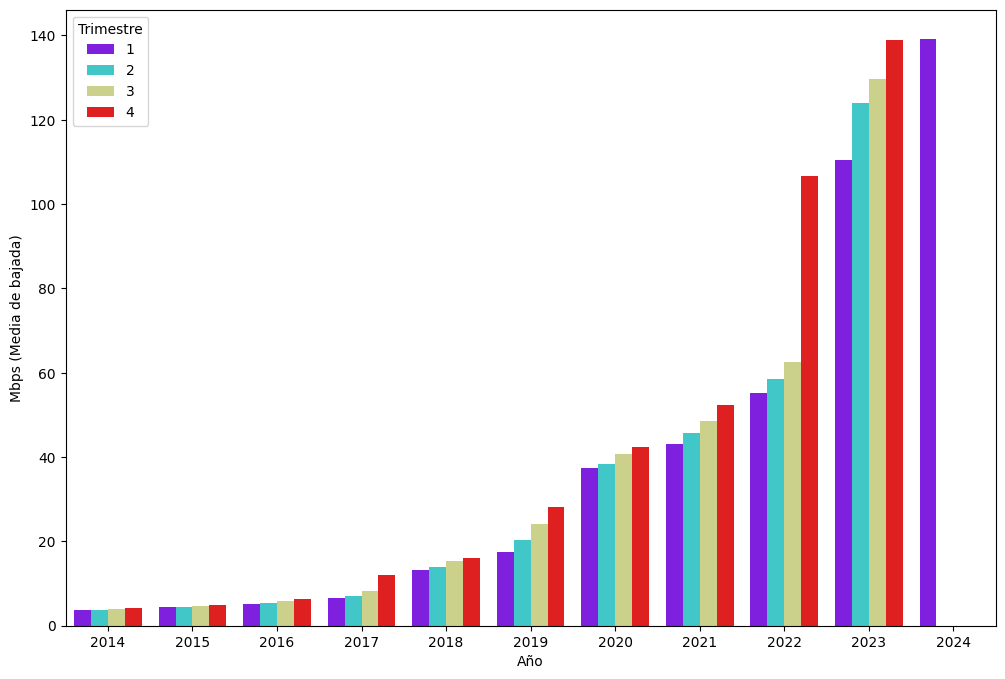

In [51]:
plt.figure(figsize=(12,8))
sns.barplot(x='Año', y='Mbps (Media de bajada)',data=I_tmb, hue='Trimestre',palette = 'rainbow')


#### Análisis

1. Incremento constante de la velocidad:
- El incremento de la velocidad ha sido significativo desde el 2014 hasta el primer trimestre del 2024.
- Especialmente a partir del año 2019 se puede ver un incremento acelerado de la velocidad, lo que sugiere que se dió la mejora en la infraestructura para mejores tecnologías.
- La tendencia en general muestra que la velocidad a internet se seguirá incrementando por los próximos años.
2. Consistencia trimestral:
- Con respecto al trimestre de cada año se puede notar una cierta consistencia.
- A pesar de tener esta consistencia en el último trimestre de cada año se puede notar un pico estacional, lo que puede estar relacionado con promociones o nuevas inversiones de fin de año.
3. Impacto de la Pandemia de Covid-19:
- El crecimiento más pronunciado se halla a a partir del último trimestre del 2019, debido al incremento de la demanda de servicios de internet a causa de la pandemia, incrementándose el trabajo remoto y la educación en línea.
4. Potenciales áreas de mejora:
- Si bien se tiene una tendencia positiva, hay oportunidades para mejorar la infraestructura en diversas zonas de Argentina para que se logre expandir tecnologías como la FIBRA ÓPTICA y el CABLEMODEM.


### Visualización de Penetración hogares 

In [10]:

I_ph = pd.read_csv('Internet_Penetracion-hogares.csv')
I_ph.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2024,1,Buenos Aires,81.10
1,2024,1,Capital Federal,119.53
2,2024,1,Catamarca,68.82
3,2024,1,Chaco,46.70
4,2024,1,Chubut,84.89


In [7]:
I_ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           984 non-null    int64  
 1   Trimestre                     984 non-null    int64  
 2   Provincia                     984 non-null    object 
 3   Accesos por cada 100 hogares  984 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 30.9+ KB


In [8]:
I_ph.describe()

,Año,Trimestre,Accesos por cada 100 hogares
count,984.000000,984.000000,984.000000
mean,2018.634146,2.463415,52.159491
std,2.962686,1.128870,24.036101
min,2014.000000,1.000000,9.347208
25%,2016.000000,1.000000,33.204632
50%,2019.000000,2.000000,49.435000
75%,2021.000000,3.000000,65.706626
max,2024.000000,4.000000,124.061394


Búsqueda de duplicados

In [95]:
duplicados  = sum(I_ph.duplicated())
duplicados

0

### Gráfica del crecimiento trimestral del acceso a internet por cada 100 hogares

<Axes: title={'center': 'Crecimiento trimestral del acceso a internet por cada 100 hogares en los años 2014-2024 '}, xlabel='Año', ylabel='Accesos por cada 100 hogares'>

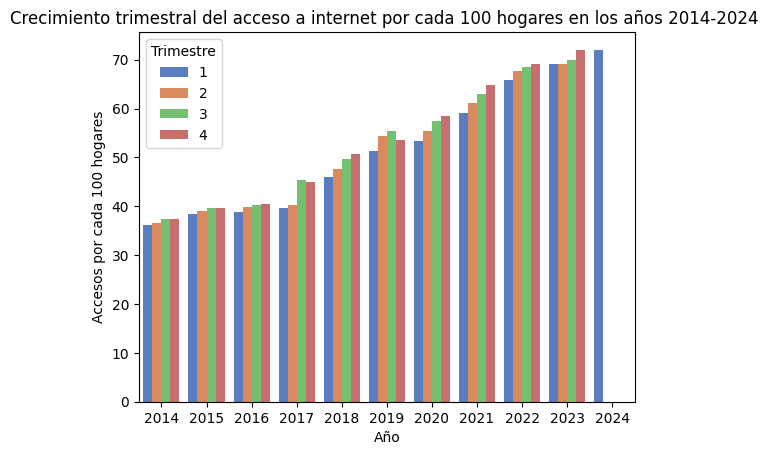

In [30]:
plt.title('Crecimiento trimestral del acceso a internet por cada 100 hogares en los años 2014-2024 ')
sns.barplot(x='Año', y='Accesos por cada 100 hogares',data=I_ph, hue='Trimestre',palette = 'muted', errorbar= None)

#### Análisis:

- Tendencia al crecimiento, mostrándose incremento constante a partir desde el 2014 hasta el primer trimestre del 2024.
- A partir del último trimestre del 2022 se nota una estabilización en cuanto al crecimiento. 

C:\Users\josej\AppData\Local\Temp\ipykernel_27208\477189364.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accesos por cada 100 hogares' ,data=I_ph[I_ph['Año'] == 2024], y='Provincia',palette = 'rainbow', errorbar= None)


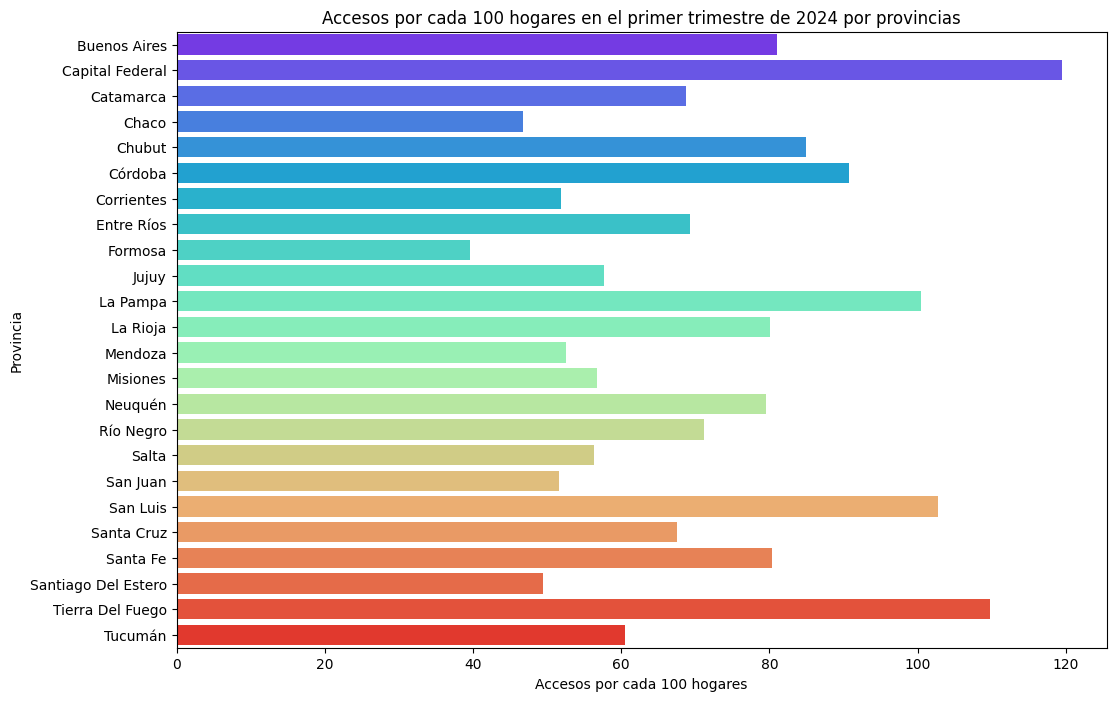

In [100]:
plt.figure(figsize=(12, 8))
plt.title('Accesos por cada 100 hogares en el primer trimestre de 2024 por provincias')
sns.barplot(x='Accesos por cada 100 hogares' ,data=I_ph[I_ph['Año'] == 2024], y='Provincia',palette = 'rainbow', errorbar= None)
plt.show()

#### Análisis:

- Existe una clara desigualdad con respecto a la velocidad de cada provincia. Capital Federal y Tierra del Fuego tienen los mayores accesos, superando los 100 accesos por cada 100 hogares, lo que indica una penetración completa o incluso superior.
-  Provincias como Chaco,Tucumán, Santiago del Estero y Formosa muestran un acceso mucho menor, por debajo de los 60 accesos por cada 100 hogares, lo que indica que aún queda trabajo por hacer para mejorar la conectividad en estas regiones.
-  Las provincias con mayor acceso probablemente cuentan con mejor infraestructura, lo que facilita una mayor adopción de servicios de internet.

### Visualización de ingresos

In [3]:
I_ingresos = pd.read_csv('Internet_ingresos.csv')
I_ingresos=I_ingresos.sort_values(by =['Año', 'Trimestre'], ascending= True) 
I_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Periodo
40,2014,1,2.984054e+06,Ene-Mar 2014
39,2014,2,3.270816e+06,Abr-Jun 2014
38,2014,3,3.478638e+06,Jul-Sept 2014
37,2014,4,3.950441e+06,Oct-Dic 2014
36,2015,1,4.876385e+06,Ene-Mar 2015


In [34]:
I_ingresos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 40 to 0
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        41 non-null     int64  
 1   Trimestre                  41 non-null     int64  
 2   Ingresos (miles de pesos)  41 non-null     float64
 3   Periodo                    41 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.6+ KB


In [35]:
I_ingresos.describe()

,Año,Trimestre,Ingresos (miles de pesos)
count,41.000000,41.000000,4.100000e+01
mean,2018.634146,2.463415,3.885074e+07
std,2.997967,1.142313,5.422892e+07
min,2014.000000,1.000000,2.984054e+06
25%,2016.000000,1.000000,6.912442e+06
50%,2019.000000,2.000000,2.020741e+07
75%,2021.000000,3.000000,4.299994e+07
max,2024.000000,4.000000,2.804191e+08


Búsqueda de duplicados

In [96]:
duplicados  = sum(I_ingresos.duplicated())
duplicados

0

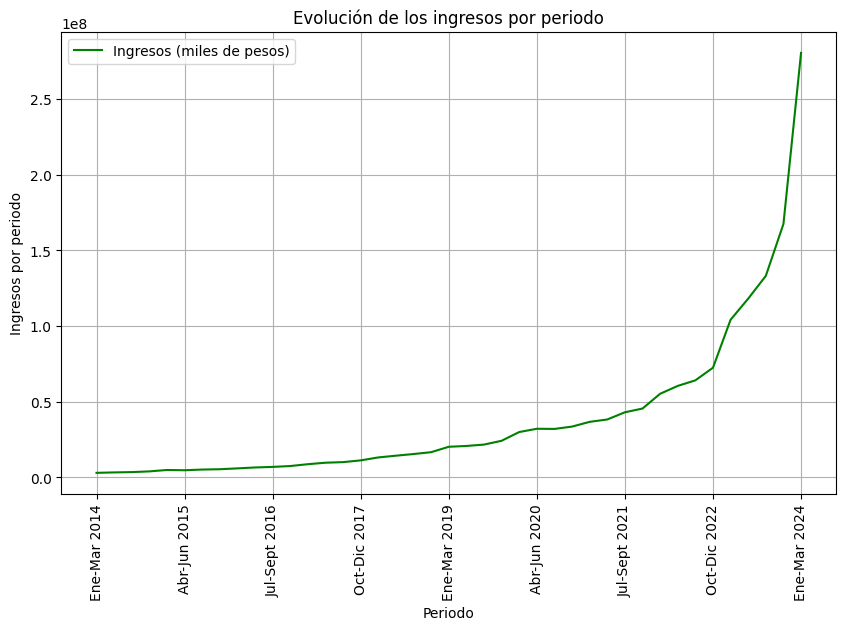

In [5]:
I_ingresos.plot(kind = 'line', x = 'Periodo', y = 'Ingresos (miles de pesos)', figsize= (10,6), color = 'green')
plt.title('Evolución de los ingresos por periodo')
plt.xlabel('Periodo')
plt.ylabel('Ingresos por periodo')
plt.xticks(rotation = 90)
plt.grid(True)
plt.show()

#### Análisis:

1. Crecimiento Exponencial Reciente:
- A partir de 2020, se observa un crecimiento exponencial en los ingresos. Este incremento puede estar relacionado con varios factores, incluyendo la mayor demanda de servicios de internet debido a la pandemia de COVID-19, que impulsó el trabajo y la educación en línea.
- La aceleración del crecimiento es especialmente pronunciada en 2023 y el primer trimestre de 2024, lo que sugiere un auge en la adopción de servicios de internet o posibles ajustes en los precios de los servicios.
2. Influencia de la inflación:
- El aumento en los ingresos también está influenciado por la inflación, dado que los precios de los servicios de internet se ajustaron durante estos periodos según datos de https://datosmacro.expansion.com/ipc-paises/argentina, afectando los ingresos totales sin necesariamente un cambio proporcional en la cantidad de usuarios.
3. Conclusiones:
- Considerar análisis adicionales para comprender mejor los factores que impulsan este crecimiento, como la inflación, la expansión de la infraestructura, o cambios en la demanda de los consumidores.
- El gráfico muestra mercado dinámico y en constante crecimiento, con un notable crecimiento en los ingresos que tiene varias causas subyacentes.

### Visualización de la Portabilidad

In [16]:
portabilidad = pd.read_csv('Portabilidad.csv')
portabilidad.head()

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros,Periodo
0,2012,3,-17,19,0,-2,0,2012-03-01
1,2012,4,3508,-1134,-189,-2185,0,2012-04-01
2,2012,5,1253,4792,-853,-5192,0,2012-05-01
3,2012,6,3263,-1248,-848,-1167,0,2012-06-01
4,2012,7,5554,-3847,-1105,-602,0,2012-07-01


In [12]:
portabilidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0    Año        145 non-null    int64 
 1    Mes        145 non-null    int64 
 2    Personal   145 non-null    int64 
 3    Claro      145 non-null    int64 
 4    Nextel     145 non-null    int64 
 5    Movistar   145 non-null    int64 
 6   Otros       145 non-null    int64 
 7    Periodo    145 non-null    object
dtypes: int64(7), object(1)
memory usage: 9.2+ KB


In [46]:
portabilidad.describe()

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros,Periodo
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145
mean,2017.710345,6.475862,1362.303448,4368.117241,-1180.068966,-4619.586207,69.234483,2018-03-02 01:09:31.034482688
min,2012.000000,1.000000,-18668.000000,-42345.000000,-4964.000000,-63567.000000,0.000000,2012-03-01 00:00:00
25%,2015.000000,3.000000,-4025.000000,-1128.000000,-1843.000000,-11858.000000,0.000000,2015-03-01 00:00:00
50%,2018.000000,6.000000,-246.000000,3972.000000,-1235.000000,-3534.000000,0.000000,2018-03-01 00:00:00
75%,2021.000000,9.000000,3701.000000,10231.000000,0.000000,674.000000,0.000000,2021-03-01 00:00:00
max,2024.000000,12.000000,41931.000000,38116.000000,0.000000,41453.000000,1095.000000,2024-03-01 00:00:00
std,3.511721,3.464268,10581.054197,13816.017907,1196.263208,14489.275544,202.870615,NaN


Búsqueda de duplicados

In [97]:
duplicados  = sum(portabilidad.duplicated())
duplicados

0

Limpieza de espacios adicionales 

In [43]:
portabilidad.columns = portabilidad.columns.str.strip()

Conversión a formato datetime

In [44]:
portabilidad['Periodo'] = pd.to_datetime(portabilidad['Periodo'])

### Gráfica de tendencias de portabilidad Neta

Nota: se omite la columna 'otros' debido a su baja relevancia en el mercado

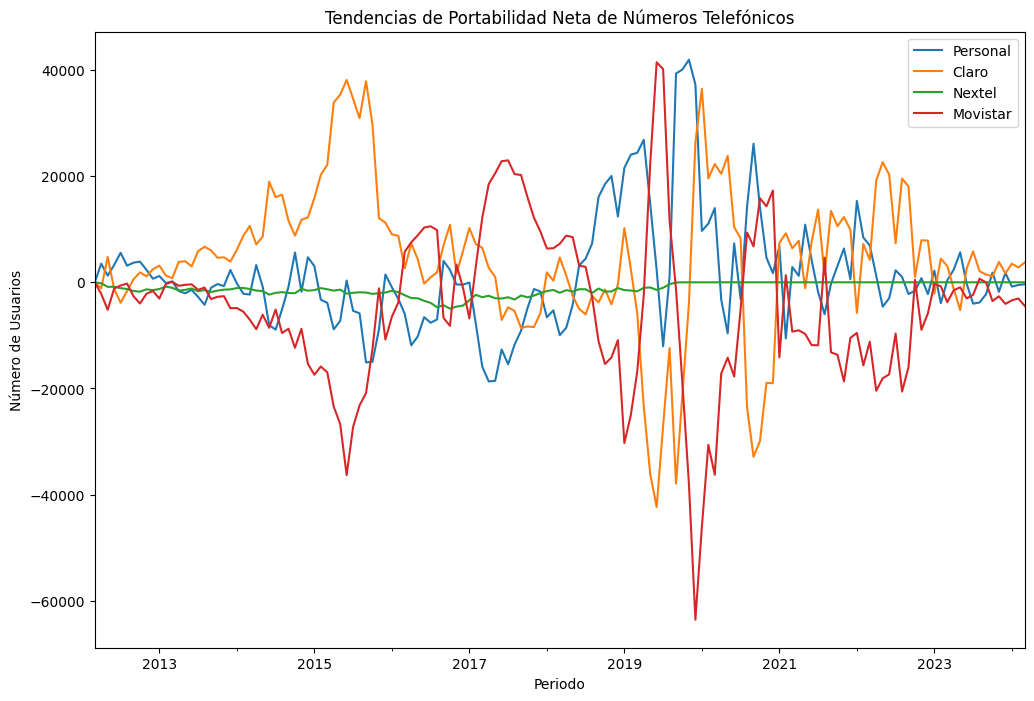

In [48]:

portabilidad.plot(kind='line', x='Periodo', y=['Personal', 'Claro', 'Nextel', 'Movistar'], figsize=(12, 8))
plt.title('Tendencias de Portabilidad Neta de Números Telefónicos')
plt.xlabel('Periodo')
plt.ylabel('Número de Usuarios')
plt.legend()
plt.show()


#### Análisis


1. Claro y Personal:
- La gráfica muestra que se tienen presentes fluctuaciones significativas con periodos de ganancia neta seguidos por pérdidas continuas.
2. Movistar:
- Se observa que este proveedor es el que presenta mayores periodos de pérdida neta con respecto a los de ganancia.
3. Nextel: 
- Esta es la compañia con menores fluctuaciones y estabilidad durante su tiempo de vida, dado que a mediados de 2019 la empresa dejó de estar en funcionamiento.

### Visualizacion de Portabilidad Bruta

In [42]:
portin = pd.read_csv('Portin.csv')
portin = portin.sort_values(by = ['Año','Mes'], ascending= True )
portin.head()

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros,Total general
144,2012,3,40,72,0.0,41,NaN,153
143,2012,4,4883,2188,26.0,937,NaN,8034
142,2012,5,10770,15663,312.0,7890,NaN,34635
141,2012,6,10472,10153,676.0,9523,NaN,30824
140,2012,7,13494,9651,487.0,10173,NaN,33805


In [49]:
portin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 144 to 0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Año            145 non-null    int64  
 1   Mes            145 non-null    int64  
 2   Personal       145 non-null    int64  
 3   Claro          145 non-null    int64  
 4   Nextel         78 non-null     float64
 5   Movistar       145 non-null    int64  
 6   Otros          25 non-null     float64
 7   Total general  145 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 10.2 KB


In [50]:
portin.describe()

,Año,Mes,Personal,Claro,Nextel,Movistar,Otros,Total general
count,145.000000,145.000000,145.000000,145.000000,78.000000,145.000000,25.000000,145.000000
mean,2017.710345,6.475862,46412.868966,58070.448276,123.538462,53099.682759,413.120000,159024.379310
std,3.511721,3.464268,28335.708966,33051.804927,140.601647,38528.304300,338.253643,96292.031966
min,2012.000000,1.000000,40.000000,72.000000,0.000000,41.000000,9.000000,153.000000
25%,2015.000000,3.000000,28078.000000,35730.000000,12.250000,15167.000000,143.000000,91147.000000
50%,2018.000000,6.000000,40469.000000,56791.000000,91.500000,45767.000000,307.000000,140945.000000
75%,2021.000000,9.000000,62834.000000,76641.000000,171.500000,85248.000000,650.000000,236738.000000
max,2024.000000,12.000000,132957.000000,132676.000000,676.000000,143327.000000,1130.000000,377682.000000


Búsqueda de duplicados

In [98]:
duplicados  = sum(portin.duplicated())
duplicados

0

Limpieza de columnas con un espacio adicional en el nombre

In [51]:
portin.columns = portin.columns.str.strip()

Creación de la columna Periodo 

In [52]:
portin['Periodo'] = pd.to_datetime(portin['Año'].astype(str) + '-' + portin['Mes'].astype(str) + '-01')

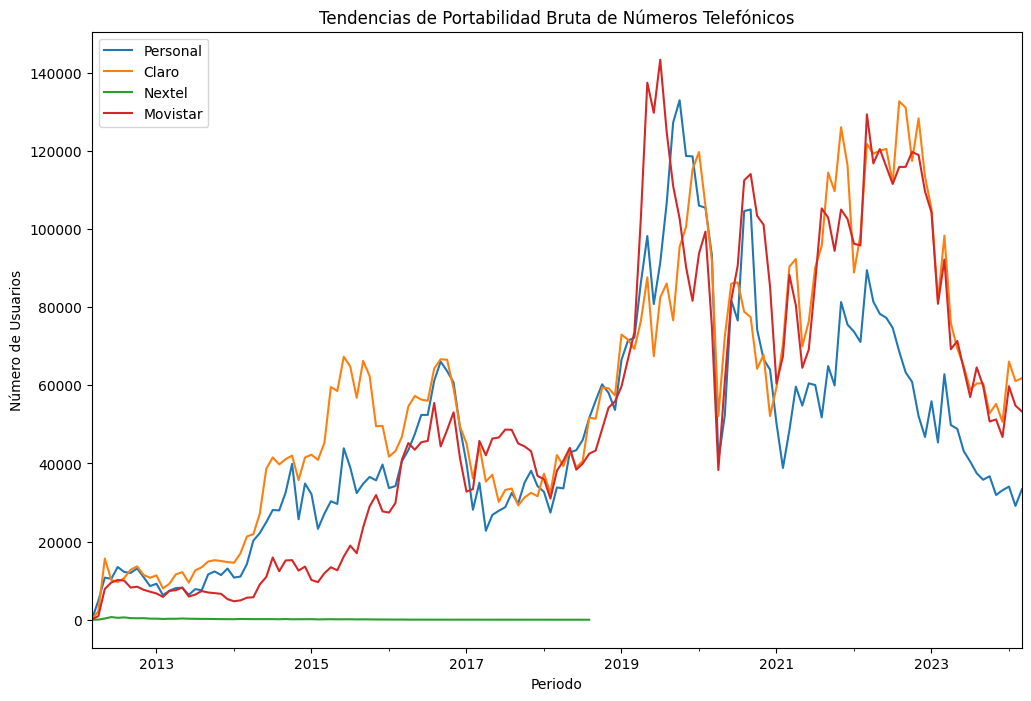

In [54]:


# Visualización de la portabilidad bruta de números telefónicos
portin.plot(kind='line', x='Periodo', y=['Personal', 'Claro', 'Nextel', 'Movistar'], figsize=(12, 8))
plt.title('Tendencias de Portabilidad Bruta de Números Telefónicos')
plt.xlabel('Periodo')
plt.ylabel('Número de Usuarios')
plt.legend()
plt.show()


#### Análisis:

1. Personal y Claro:
- Personal y Claro muestran un patrón de crecimiento constante en la portabilidad bruta, indicando que estos proveedores atraen a muchos usuarios nuevos de manera continua.
2. Movistar:
- Movistar también muestra un crecimiento constante en la portabilidad bruta, aunque con algunas fluctuaciones más notables en comparación con Personal y Claro.
3. Nextel:
- Antes del cese, Nextel muestra una muy baja presencia en el mercado, en comparación a sus competidores Movistar y Claro.

### 1. KPI: Aumento en un 2% del acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.

#### Cálculo de la meta

In [11]:
I_ph['Meta de Acceso por cada 100 hogares'] = I_ph['Accesos por cada 100 hogares']*1.02
I_ph.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Meta de Acceso por cada 100 hogares
0,2024,1,Buenos Aires,81.10,82.7220
1,2024,1,Capital Federal,119.53,121.9206
2,2024,1,Catamarca,68.82,70.1964
3,2024,1,Chaco,46.70,47.6340
4,2024,1,Chubut,84.89,86.5878


### Gráfica comparativa de Accesos Actuales vs Meta por provincia

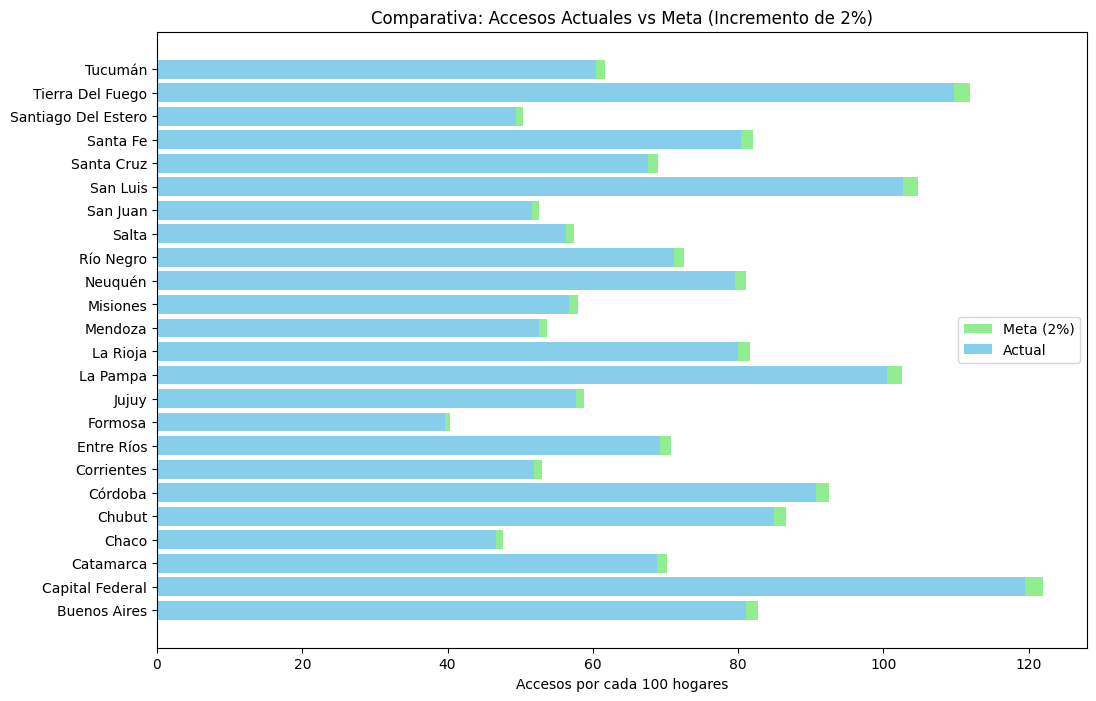

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))

I_ph_2024 = I_ph[I_ph['Año'] == 2024]

ax.barh(I_ph_2024['Provincia'], I_ph_2024['Meta de Acceso por cada 100 hogares'], color='lightgreen', label='Meta (2%)')
ax.barh(I_ph_2024['Provincia'], I_ph_2024['Accesos por cada 100 hogares'], color='skyblue', label='Actual')


ax.set_xlabel('Accesos por cada 100 hogares')
ax.set_title('Comparativa: Accesos Actuales vs Meta (Incremento de 2%)')
ax.legend()
plt.show()

#### Análisis:

1. Meta Alcanzable:
-  En muchas provincias, el incremento del 2% no parece una barrera demasiado alta. El espacio entre las barras actuales y las metas es pequeño, lo que indica que un ligero esfuerzo adicional podría ser suficiente para alcanzar el KPI.
2. Provincias con Mayor Desafío:
-  Algunas provincias, como Capital Federal y Tierra del Fuego, ya tienen un nivel alto de acceso, por lo que alcanzar incluso un 2% adicional podría requerir más esfuerzo debido a la saturación del mercado.
3. Provincias con potencial crecimiento:
- Provincias como Formosa, Santiago del Estero y Tucumán, que tienen niveles más bajos de acceso, tienen una oportunidad significativa de crecimiento. En estas áreas, un incremento del 2% podría ser más fácil de lograr con inversiones dirigidas.


#### Conclusiones:
1. Foco en las provincias con mayor Brecha: 
 - Las provincias con una mayor diferencia de accesos a internet, son las que tienen un mayor potencial de crecimiento por lo que deben de ser priorizadas para recibir inversiones.
2. Variación de las Estrategias:
 - Las provincias con niveles altos de acceso podrían requerir estrategias diferentes, como mejoras en la calidad del servicio o la introducción de nuevos planes para incentivar la adopción adicional.
3. Despliegue de tecnología:
 - En provincias en las que sea muy costoso o poco viable la implementación de mejor infraestructura se debería utilizar tecnologías satelitales o inalámbricas.

### 2. KPI: Aumento en un 5% el número de conexiones por fibra óptica a nivel Nacional

Visualización del crecimiento en el último trimestre

In [93]:
I_apt_23_4 = I_apt[(I_apt['Año'] == 2023) & (I_apt['Trimestre'] == 4)]
I_apt_24_1= I_apt[(I_apt['Año'] == 2024) &(I_apt['Trimestre'] == 1)]
union = I_apt_24_1.merge(I_apt_23_4, on='Provincia', suffixes=('_2024', '_2023'))
union['crecimiento'] = (union['Fibra óptica_2024'] - union['Fibra óptica_2023'])/union['Fibra óptica_2023']*100
print(union[['Provincia', 'Fibra óptica_2024', 'Fibra óptica_2023', 'crecimiento']])
print((union['crecimiento']).mean())


              Provincia  Fibra óptica_2024  Fibra óptica_2023  crecimiento
0          Buenos Aires          1799013.0          1784593.0     0.808027
1       Capital Federal           203756.0           182520.0    11.634889
2             Catamarca            56542.0            55437.0     1.993254
3                 Chaco            64463.0            62301.0     3.470249
4                Chubut            26356.0            26174.0     0.695347
5               Córdoba           458985.0           440536.0     4.187853
6            Corrientes            38268.0            35968.0     6.394573
7            Entre Ríos            66180.0            61667.0     7.318339
8               Formosa            17908.0            16179.0    10.686693
9                 Jujuy            51084.0            49947.0     2.276413
10             La Pampa            35556.0            34331.0     3.568204
11             La Rioja            23086.0            22559.0     2.336096
12              Mendoza  

Cálculo de la meta

In [103]:
I_apt['Meta de accesos de fibra optica'] = I_apt['Fibra óptica']*1.04
I_apt.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Meta de accesos de fibra optica
0,2024,1,Buenos Aires,203297.0,2790663.0,1799013.0,150290.0,101294.0,5044557.0,1870973.52
1,2024,1,Capital Federal,70108.0,1177475.0,203756.0,4493.0,48879.0,1504711.0,211906.24
2,2024,1,Catamarca,5901.0,11025.0,56542.0,1384.0,81.0,74933.0,58803.68
3,2024,1,Chaco,11343.0,58929.0,64463.0,8404.0,12404.0,155543.0,67041.52
4,2024,1,Chubut,26306.0,77217.0,26356.0,30867.0,9930.0,170676.0,27410.24


### Gráfica comparativa de Coneciones por Fibra óptica Actuales vs Meta por provincia

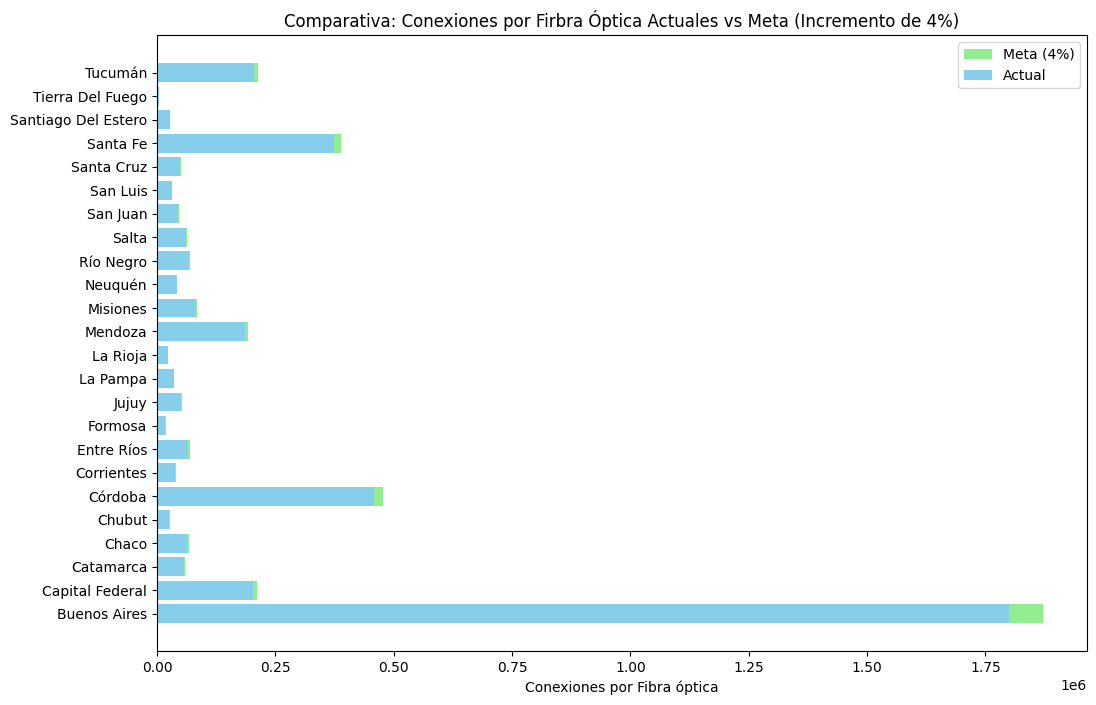

In [105]:
fig, ax = plt.subplots(figsize=(12, 8))

I_apt_2024 = I_apt[I_apt['Año'] == 2024]

ax.barh(I_apt_2024['Provincia'], I_apt_2024['Meta de accesos de fibra optica'], color='lightgreen', label='Meta (4%)')
ax.barh(I_apt_2024['Provincia'], I_apt_2024['Fibra óptica'], color='skyblue', label='Actual')


ax.set_xlabel('Conexiones por Fibra óptica')
ax.set_title('Comparativa: Conexiones por Firbra Óptica Actuales vs Meta (Incremento de 4%)')
ax.legend()
plt.show()

#### Análisis

1. Meta Alcanzable:
-  La meta del 3% es alcanzable en general, pero requerirá estrategias personalizadas para cada tipo de provincia. En las áreas urbanas desarrolladas, el enfoque deberá estar en la competencia y la diferenciación de servicios.

2. Desafíos de Saturación: 
-  Aunque la meta es alcanzable, la saturación del mercado en estas áreas podría hacer que cada nuevo incremento sea más difícil de lograr. Aquí, la competencia entre proveedores y la diferenciación en los servicios serán clave para lograr la meta.

3. Necesidad de Inversión:
- ra alcanzar la meta, es crucial continuar invirtiendo en la expansión de la red de fibra óptica, asegurando que la infraestructura pueda soportar la demanda adicional.

4. Desafíos Significativos: 
-  En provincias con baja penetración, aunque el 3% no representa una gran cifra en términos absolutos, es sin duda un desafío debido a la falta de infraestructura y, posiblemente, a una demanda más baja o falta alfabetización digital.



#### Conclusión: 
- La meta es alcanzable pero dependerá de la capacidad de los proveedores a implementar rápidamente mejoras en la infraestructura y su habilidad para competir en mercados saturados.
- En las áreas menos desarrolladas, se necesitarán inversiones significativas y posiblemente subsidios para mejorar la infraestructura y fomentar la adopción.

### 3. KPI: Incremento de la Velocidad Media de Bajada en un 6%

In [117]:
I_tmb['Crecimiento'] = I_tmb['Mbps (Media de bajada)'].pct_change(periods=-1) * 100
I_tmb.head()


,Año,Trimestre,Mbps (Media de bajada),Trimestre.1,Crecimiento
0,2024,1,139.15,Ene-Mar 2024,0.079114
1,2023,4,139.04,Oct-Dic 2023,7.226035
2,2023,3,129.67,Jul-Sept 2023,4.614764
3,2023,2,123.95,Abr-Jun 2023,12.171946
4,2023,1,110.50,Ene-Mar 2023,3.697447


Crecimiento promedio del último año hasta la actualidad

In [102]:
creci_mean = I_tmb[(I_tmb['Año'] == 2023) | (I_tmb['Año'] == 2024)]['Crecimiento'].mean()
creci_mean

5.557861282206682

Cálculo de la meta

In [109]:
m = (6*139.15/100)+139.15
m

147.499

In [118]:
meta = {'Año':2024, 'Trimestre':2,'Mbps (Media de bajada)': 147.499,'Trimestre.1': 'Abr-Jun 2024', 'Crecimiento': 6}
meta_df = pd.DataFrame([meta])
I_tmb = pd.concat([meta_df, I_tmb]).reset_index(drop=True)
I_tmb.head()

,Año,Trimestre,Mbps (Media de bajada),Trimestre.1,Crecimiento
0,2024,2,147.499,Abr-Jun 2024,6.000000
1,2024,1,139.150,Ene-Mar 2024,0.079114
2,2023,4,139.040,Oct-Dic 2023,7.226035
3,2023,3,129.670,Jul-Sept 2023,4.614764
4,2023,2,123.950,Abr-Jun 2023,12.171946


Creación de la columna Periodo

In [139]:
I_tmb = I_tmb.sort_values(by=['Año', 'Trimestre'], ascending=True)

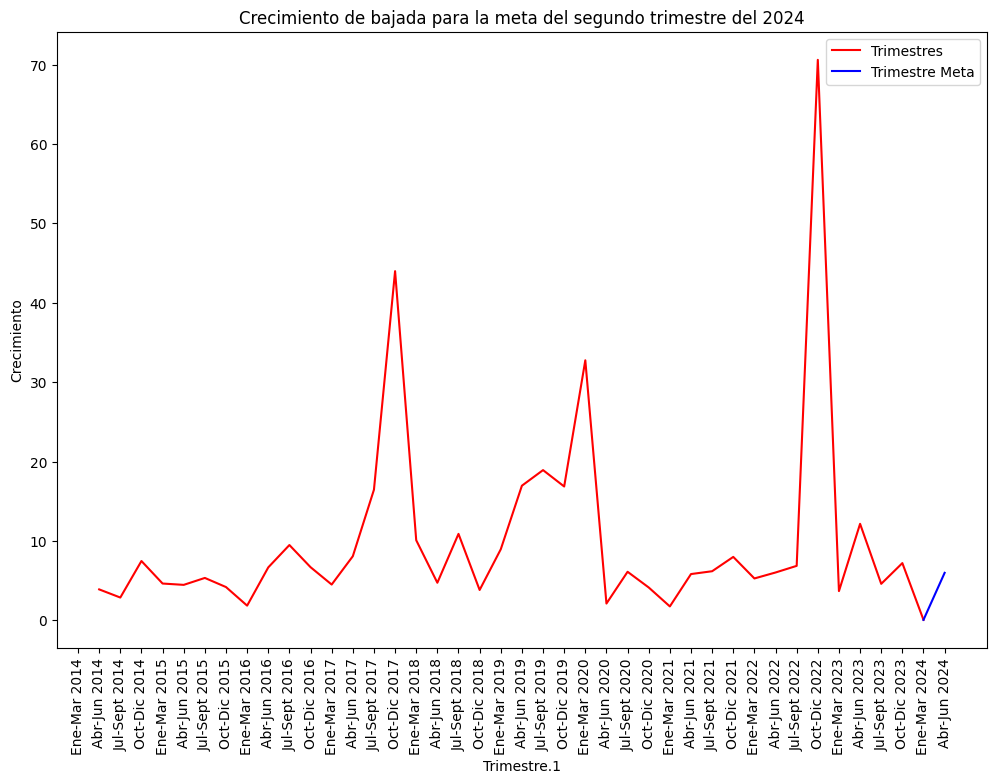

In [149]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Trimestre.1', y='Crecimiento', data=I_tmb[:-1], errorbar=None, color='red', label='Trimestres')
sns.lineplot(x='Trimestre.1', y='Crecimiento', data=I_tmb[-2:], errorbar=None, color='blue', label='Trimestre Meta')
plt.title('Crecimiento de bajada para la meta del segundo trimestre del 2024')
plt.xticks(rotation=90)
plt.legend()
plt.show()


#### Análisis

1. Comparación con el Crecimiento Histórico:
- La línea azul que representa la meta del 6% para el próximo trimestre parece estar en línea con los crecimientos más modestos del pasado, pero todavía es un desafío considerable dado que la mayoría de los trimestres recientes muestran crecimientos menores.
2. Dificultades de la Meta:
- Dado el comportamiento histórico, alcanzar un crecimiento del 6% en la velocidad media de bajada en el próximo trimestre es ambicioso, especialmente si consideramos que los incrementos significativos suelen estar vinculados a eventos específicos, como grandes actualizaciones de infraestructura o lanzamientos tecnológicos.

#### Conclusión:

- Es importante gestionar las expectativas, reconociendo que aunque la meta es alcanzable, podría requerir un esfuerzo significativo y un enfoque coordinado por parte de todas las partes interesadas.
- Aunque la meta del 6% es ambiciosa, es alcanzable si se alinean varios factores clave, incluyendo la inversión en infraestructura, la adopción de nuevas tecnologías, y un entorno regulatorio favorable.

# Conclusiones Generales:

## 1. Crecimiento Exponencial de Ingresos por Servicios de Internet


- **Incremento de la Demanda debido a la Pandemia**: La pandemia de COVID-19 cambió radicalmente la forma en que las personas interactúan con el mundo digital. El trabajo, la educación en línea, y la necesidad de entretenimiento en casa aumentaron la demanda de servicios de internet. Las empresas de telecomunicaciones aprovecharon esta oportunidad, lo que se tradujó en un aumento sustancial de los ingresos.

- **Ajustes Económicos**: Una parte del aumento en los ingresos esté vinculada a ajustes en los precios de los servicios de internet. Esto esta relacionado con la inflación y la necesidad de las empresas de telecomunicaciones de mantener la rentabilidad. No obstante, es crucial que estos ajustes se realicen con cautela para no desalentar la adopción adicional, especialmente en las partes del mercado ya saturado.

- **Expansión de la Infraestructura y Adopción de Nuevas Tecnologías**: La adopción creciente de tecnologías más rápidas y confiables, como la fibra óptica, ha permitido a los proveedores de servicios ofrecer planes de mayor calidad a precios más altos. 

## 2. Desigualdad Regional en la Penetración de Internet

El análisis de la penetración de internet por cada 100 hogares revela una brecha digital significativa entre las diferentes provincias de Argentina:

- **Provincias con Alta Penetración**: Buenos Aires y Tierra del Fuego son ejemplos de provincias con alta penetración, donde el acceso a internet es casi universal. Sin embargo, esto también sugiere que el mercado en estas áreas podría estar cerca de la saturación, haciendo que el crecimiento futuro dependa de la introducción de nuevos servicios o mejoras en la calidad del servicio.

- **Provincias con Baja Penetración**: Provincias como Tucumán, Santiago del Estero y Formosa muestran una penetración significativamente menor. Esto sugiere una falta de infraestructura adecuada. La brecha digital en estas áreas señalan las desigualdades económicas y sociales, limitando el acceso a la información y a las oportunidades económicas.
- **Oportunidades de Crecimiento**: Las provincias con menor penetración representan una oportunidad significativa para las empresas de telecomunicaciones. Invertir en infraestructura en estas áreas no solo ayudará a cerrar la brecha digital, sino que también permitirá a las empresas captar un nuevo segmento de mercado.

## 3. Transición Tecnológica y Preferencias del Consumidor

- **Declive del ADSL**: La caída constante en el uso de ADSL refleja la obsolescencia de esta tecnología frente a opciones más rápidas y confiables. Los usuarios buscan velocidades más altas y una mejor experiencia en línea, lo que ha llevado a una adopción masiva de alternativas más modernas.

- **Ascenso de la Fibra Óptica**: La fibra óptica ha experimentado un crecimiento exponencial, lo que indica que los usuarios están dispuestos a pagar más por un servicio de internet que ofrezca velocidades superiores y mayor estabilidad. Este crecimiento sugiere que la fibra óptica se convertirá en la tecnología dominante en el futuro cercano.

- **Estabilización del Cablemodem**: Aunque el cablemodem ha sido una tecnología popular, su crecimiento comienza a estabilizarse. Esto podría ser un indicio de que el mercado está alcanzando su madurez en esta área, y que la fibra óptica está empezando a reemplazarla como la opción preferida.

## 4. Impacto de la Infraestructura y Políticas Públicas

- **Desigualdad en la Infraestructura**: Las provincias con menor penetración a menudo carecen de la infraestructura necesaria para ofrecer servicios de internet de alta calidad. Esto pone de relieve la necesidad de inversiones públicas y privadas en estas áreas para asegurar que todos los ciudadanos tengan acceso a internet de calidad.

- **Innovación en Modelos de Negocio**: Para superar las barreras de infraestructura en áreas rurales, las empresas de telecomunicaciones deben explorar modelos de negocio innovadores, como el uso de tecnologías inalámbricas o satelitales, que podrían ser más viables en estas regiones que la fibra óptica tradicional.

## 5. Estrategias para Mantener el Crecimiento en un Mercado Maduro

- **Mejora Continua de la Calidad del Servicio**: Los proveedores deben enfocarse en mejorar la calidad del servicio, ofreciendo velocidades más altas, menor latencia, y mayor estabilidad. Esto no solo ayudará a retener a los clientes actuales, sino que también atraerá a nuevos usuarios.

- **Adopción de Nuevas Tecnologías**: La implementación de nuevas tecnologías, como el 5G, podría ser un diferenciador clave en un mercado saturado. Las empresas que lideren la adopción de 5G podrán ofrecer servicios significativamente mejores.

## Conclusión Final

El análisis de las gráficas revela un mercado de telecomunicaciones dinámico en Argentina, con un fuerte crecimiento impulsado por la demanda de conectividad y la adopción de nuevas tecnologías. Sin embargo, también destaca importantes desafíos, especialmente en términos de desigualdad regional y saturación del mercado en áreas desarrolladas. Las empresas de telecomunicaciones y los responsables de políticas públicas deben trabajar de la mano para cerrar la brecha digital asegurando el acceso a internet, y mantener el impulso de crecimiento mediante la innovación continua y la expansión de la infraestructura.
